In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [27]:
df = pd.read_csv('Uber Request Data (2).csv')

In [28]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [29]:
# make sure that number of duplicate rows are zero
sum(df.duplicated(subset = 'Request id')) == 0

True

In [30]:
# dimension of the data
df.shape

(6745, 6)

In [31]:
# checking for the null value in the data
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [32]:
# percentage of null values
df.isnull().sum()*100/df.shape[0]

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [33]:
# convert request timestrap into date-time object
df['Request timestamp'] = df['Request timestamp'].astype(str)
df['Request timestamp'] = df['Request timestamp'].str.replace('/', '-')
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst = True)

In [34]:
df['Request timestamp'].head()

0   2016-07-11 11:51:00
1   2016-07-11 17:57:00
2   2016-07-12 09:17:00
3   2016-07-12 21:08:00
4   2016-07-13 08:33:16
Name: Request timestamp, dtype: datetime64[ns]

In [35]:
# convert request timestrap into date-time object
df['Drop timestamp'] = df['Drop timestamp'].astype(str)
df['Drop timestamp'] = df['Drop timestamp'].str.replace('/', '-')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst = True)

In [36]:
df['Drop timestamp'].head()

0   2016-07-11 13:00:00
1   2016-07-11 18:47:00
2   2016-07-12 09:58:00
3   2016-07-12 22:03:00
4   2016-07-13 09:25:47
Name: Drop timestamp, dtype: datetime64[ns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [38]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [39]:
# extract the hour from the request time
req_hour = df["Request timestamp"].dt.hour
req_hour.head()
req_hour.value_counts()
df['req_hour'] = req_hour

In [40]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [41]:
# extract the day from request time
req_day = df['Request timestamp'].dt.day
df['req_day'] = req_day


In [42]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

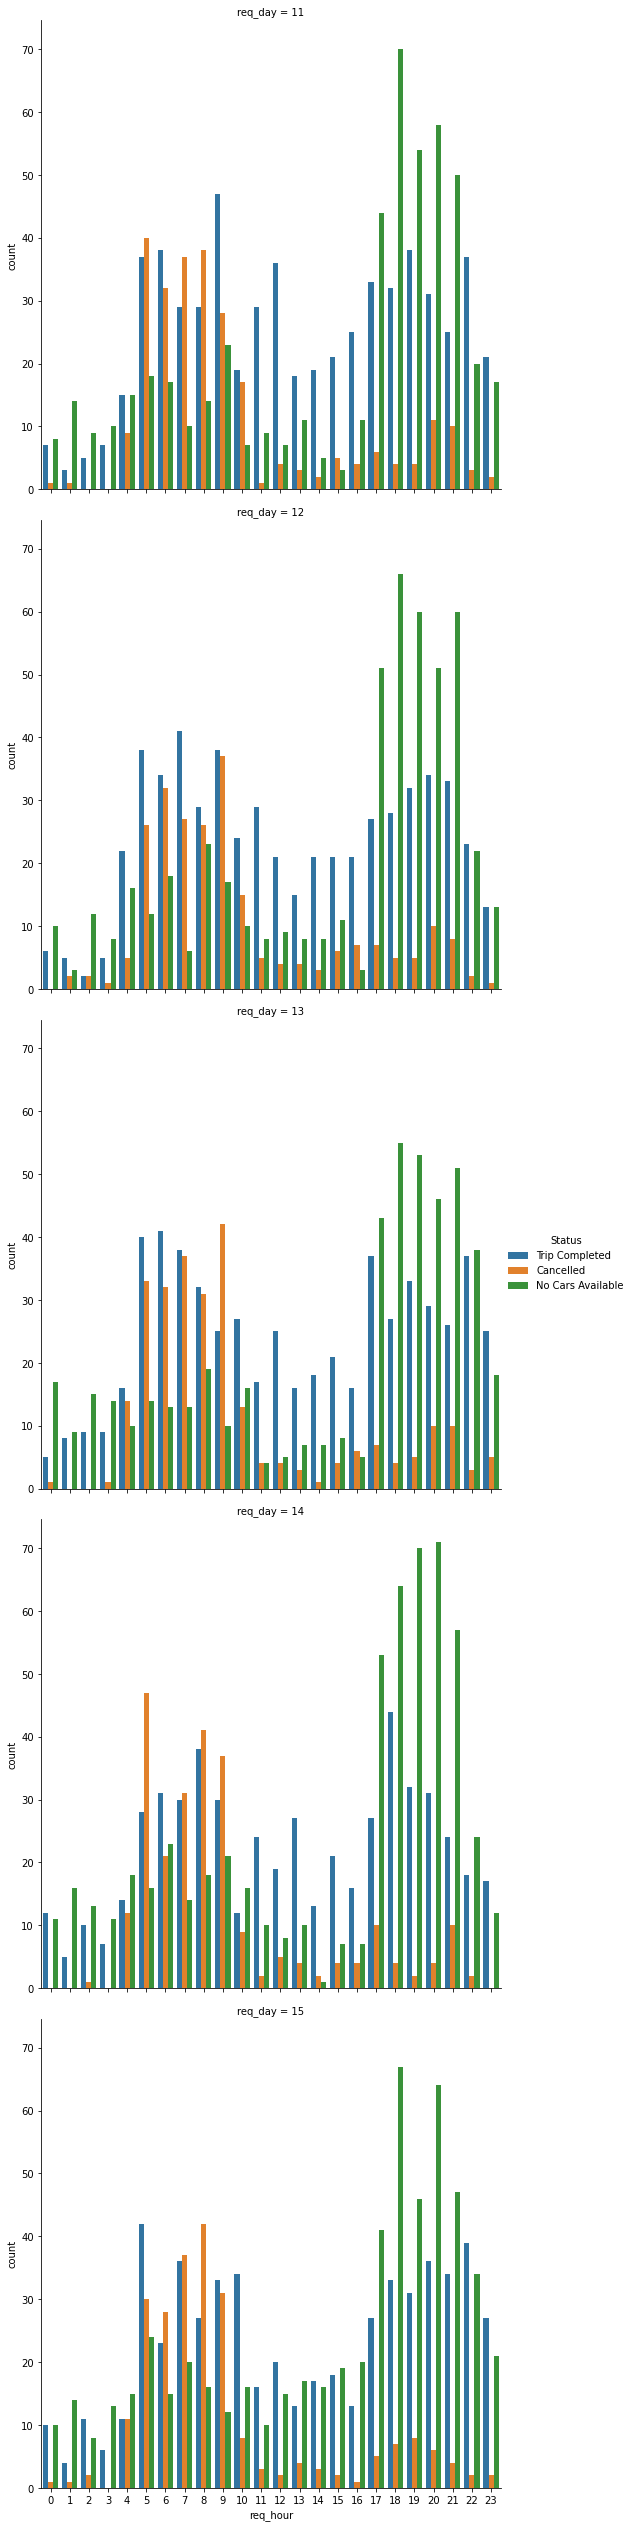

In [18]:
# factor plot of hour and day w.r.t status
plt.figure(figsize = (10,10))
sb.factorplot(x = 'req_hour', hue = 'Status', row = 'req_day', data = df, kind = 'count', size = 7)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

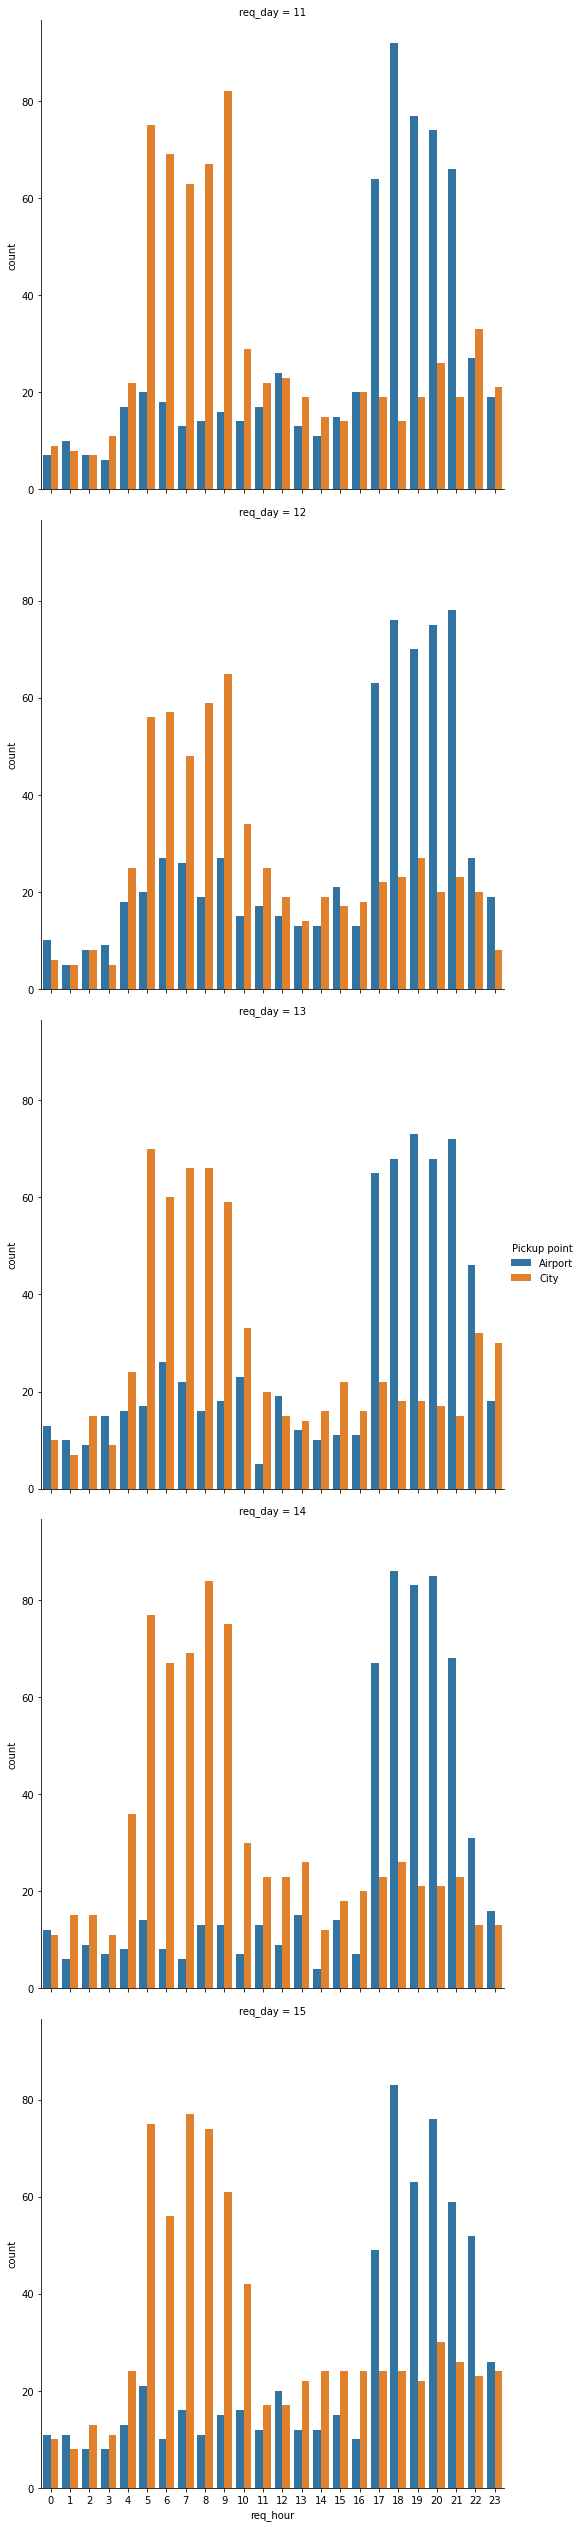

In [19]:
# factor plot of hour and day w.r.t pickup point
plt.figure(figsize = (10,10))
sb.factorplot(x = 'req_hour', hue = 'Pickup point', row = 'req_day', data = df, kind = 'count', size = 7)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


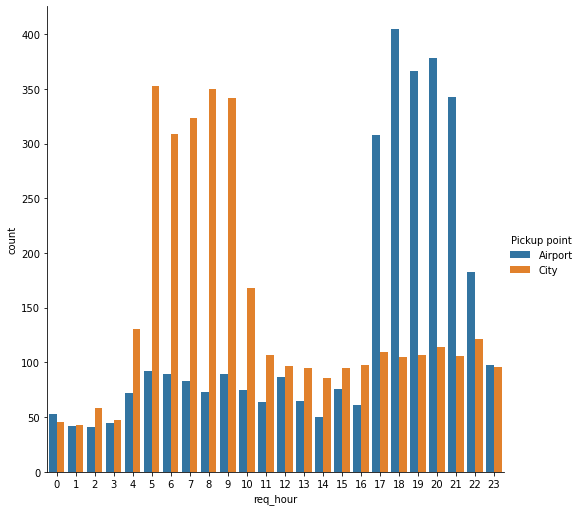

In [20]:
# aggregate count plot for all days with respect to pickup points
# factor plot of hour and day w.r.t status
sb.factorplot(x = 'req_hour', hue = 'Pickup point', data = df, kind = 'count', size = 7)
plt.show()

In [43]:
# creating a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df.req_hour.apply(lambda x: time_period(x))

In [44]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush


In [45]:
df.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

In [46]:
# another way to look at the trips made in each time slot
Pre_Morning = print (df.time_slot[df.time_slot == "Pre_Morning"].value_counts())
Morning_Rush = print (df.time_slot[df.time_slot == "Morning_Rush"].value_counts())
Day_Time = print (df.time_slot[df.time_slot == "Day_Time"].value_counts())
Evening_Rush = print (df.time_slot[df.time_slot == "Evening_Rush"].value_counts())
Late_Night = print (df.time_slot[df.time_slot == "Late_Night"].value_counts())

Pre_Morning    578
Name: time_slot, dtype: int64
Morning_Rush    2103
Name: time_slot, dtype: int64
Day_Time    1224
Name: time_slot, dtype: int64
Evening_Rush    2342
Name: time_slot, dtype: int64
Late_Night    498
Name: time_slot, dtype: int64


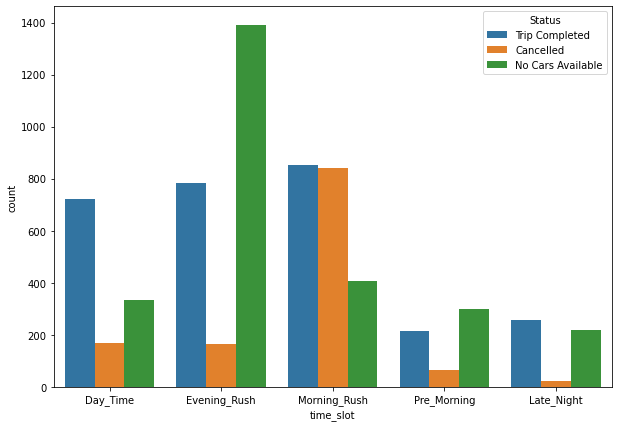

In [47]:
# plot time_slot w.r.t to status and identify the problem
plt.figure(figsize = (10,7))
sb.countplot(x = 'time_slot', hue = 'Status', data = df)
plt.show()

### Most cancellation occours during morning_rush time slot

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

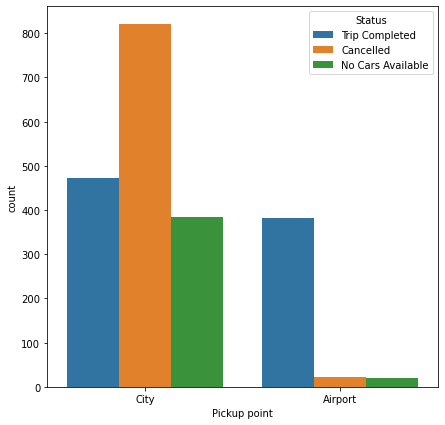

In [50]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
plt.figure(figsize = (7,7))
df_morning_rush = df[df.time_slot == "Morning_Rush"]
sb.countplot(x = "Pickup point", hue = "Status", data = df_morning_rush)

In [51]:
#cancellation of cab as per the pickup location for Morning Rush

#pickup location is airport.

df_airport_cancelled  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Cancelled")]
len(df_airport_cancelled.index)

23

In [52]:
#pickup location is city

df_city_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Cancelled")]
len(df_city_cancelled.index)

820

In [53]:
# let's look at the supply and demand in morning rush hour in the city,

df_city_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_city_completed_morning_rush.index)

472

In [54]:
df_city_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City")]
len(df_city_morning_rush.index)

1677

#### AS WE CAN SEE THAT SUPPLY IS LESS COMPARED TO DEMAND IN CITY DURING MORNING_RUSH.

In [55]:
# let's look at the supply and demand in morning rush hour at the airport.

df_airport_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_airport_completed_morning_rush.index)

382

In [56]:
df_airport_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport")]
len(df_airport_morning_rush.index)

426

#### WHEN PICKUP LOCATION IS AIRPORT THERE IS A GOOD BALANCE BETWEEN SUPPLY AND DEMAND,

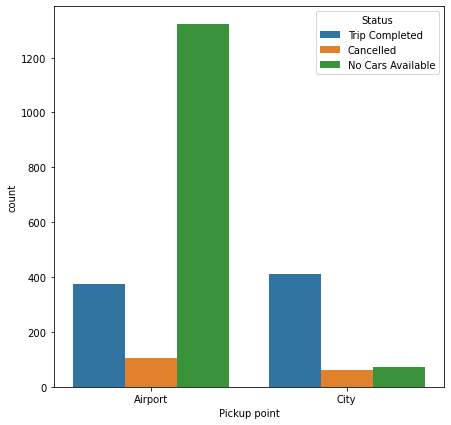

In [57]:
# let's look at the supply and demand in evening rush hour
plt.figure(figsize = (7,7))
df_evening_rush = df[df.time_slot == "Evening_Rush"]
sb.countplot(x = "Pickup point", hue = "Status", data = df_evening_rush)
plt.show()

In [58]:
# let's look at the supply and demand in evening rush hour in the city
df_city_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_city_completed_evening_rush.index)

411

In [59]:
df_city_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City")]
len(df_city_evening_rush.index)

542

In [60]:
# let's look at the supply and demand in evening rush hour from the airport
df_airport_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_airport_completed_evening_rush.index)

373

In [61]:
df_airport_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport")]
len(df_airport_evening_rush.index)

1800

#### MOSTLY THE CABS ARE NOT AVALIABLE AT AIRPORT DURING EVENING TIME.

In [62]:
# let's look at the severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening rush

df_airport_cancelled_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Cancelled")]
len(df_airport_cancelled_evening_rush.index)

106

In [63]:
df_city_cancelled_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Cancelled")]
len(df_city_cancelled_evening_rush.index)

60

In [64]:
# severity of problem by location in Morning Rush (Unavailability of Cars)

df_airport_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_morning_rush.index)

21

In [65]:
df_city_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_morning_rush.index)

385

In [66]:
# severity of problem by location in Evening Rush (Unavailability of Cars)

df_airport_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_evening_rush.index)

1321

In [67]:
df_city_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_evening_rush.index)

71

In [68]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Figure size 720x720 with 0 Axes>

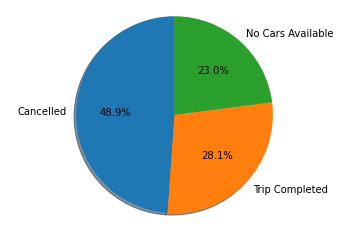

In [70]:
# percentage breakup of status on the basis of pickup location.

# Status of trips @ Morning Rush where pickup point is City.

df_city = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Morning_Rush")]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

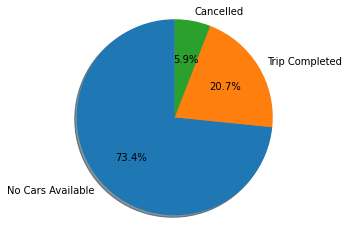

In [71]:
# Status of trips @ Evening Rush where pickup point is Airport.

df_airport = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Evening_Rush")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)